In [2]:
%matplotlib inline

import sys
sys.path.append('../')
from schism.cyclone import Record, Track
from schism.core import Grid
from schism import read_jtwc

import cartopy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

First the cyclone advisory can be hard to read, and sometimes oddly formatted. First implemented function is in schism.io named read_jtwc. It is designed to read any JTWC Best track advisory file and immidiately plot.

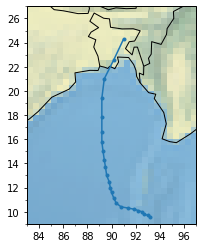

In [3]:
sidr = read_jtwc('/home/khan/Documents/Portables/Workbench/Projects/SurgeModel/HistoricCyclones/Sidr2007/bio062007.txt')
ax = sidr.plot() # Geoaxes object
ax.set_xlim([83, 97])
ax.set_xticks(np.arange(84, 97, 2))
ax.set_xticklabels(np.arange(84, 97, 2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_ylim([9, 27])
ax.set_yticks(np.arange(10, 27, 2))
ax.set_yticklabels(np.arange(10, 27, 2))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)
ax.stock_img()

Each record in the advisory file is loaded as a Record object. The records can be easily accessed using the time index and the resulting value will be a sliced track.

In [4]:
# Timeindices can be looked into using timeindex attribute
sidr.timeindex

DatetimeIndex(['2007-11-10 06:00:00', '2007-11-10 12:00:00',
               '2007-11-10 18:00:00', '2007-11-11 00:00:00',
               '2007-11-11 06:00:00', '2007-11-11 12:00:00',
               '2007-11-11 18:00:00', '2007-11-12 00:00:00',
               '2007-11-12 06:00:00', '2007-11-12 12:00:00',
               '2007-11-12 18:00:00', '2007-11-13 00:00:00',
               '2007-11-13 06:00:00', '2007-11-13 12:00:00',
               '2007-11-13 18:00:00', '2007-11-14 00:00:00',
               '2007-11-14 06:00:00', '2007-11-14 12:00:00',
               '2007-11-14 18:00:00', '2007-11-15 00:00:00',
               '2007-11-15 06:00:00', '2007-11-15 12:00:00',
               '2007-11-15 18:00:00', '2007-11-16 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [5]:
# Slicing takes slice input
sidr[3:10].timeindex

DatetimeIndex(['2007-11-11 00:00:00', '2007-11-11 06:00:00',
               '2007-11-11 12:00:00', '2007-11-11 18:00:00',
               '2007-11-12 00:00:00', '2007-11-12 06:00:00',
               '2007-11-12 12:00:00'],
              dtype='datetime64[ns]', freq=None)

In [6]:
# Check if a record exists

'2007-11-12 00:00:00' in sidr

True

In [7]:
'2007-11-12 01:00:00' in sidr

False

In [8]:
# The record at a particular time is accessed using interpolate method
s = sidr.interpolate('2007-11-12 00:00:00')

In [9]:
# Each record is a extended dictionary object
s

{'timestamp': Timestamp('2007-11-12 00:00:00'),
 'lon': 90.8,
 'lat': 10.4,
 'mslp': 97800.0,
 'vmax': 30.866666666666667,
 'rmax': 46300.025,
 'ustorm': -2.023971515495947,
 'vstorm': 1.543333333333328,
 'vinfo': array([17.49111111, 25.72222222]),
 'radinfo': array([[111120.06 , 101860.055, 101860.055, 111120.06 ],
        [ 55560.03 ,  46300.025,  46300.025,  55560.03 ]])}

In [10]:
s['lon'], s['lat'], s['timestamp']

(90.8, 10.4, Timestamp('2007-11-12 00:00:00'))

In [11]:
# timestamp, lon, lat, mslp, vmax are mendatory fields
# mslp and vmax can be nan value
# Can br created through a call to Record object

t = Record(timestamp='2010-11-12 00:00:00', lon=90.1, lat=12.5, mslp=100000, vmax=17)
t

{'timestamp': Timestamp('2010-11-12 00:00:00'),
 'lon': 90.1,
 'lat': 12.5,
 'mslp': 100000,
 'vmax': 17,
 'rmax': nan,
 'vinfo': nan,
 'radinfo': nan,
 'ustorm': nan,
 'vstorm': nan}

In [12]:
# It implements function to change it to 10m level to boundary layer
t.gen_radial_fields(fraction=0.56, angle=19.2, swrf=0.9)
t.calc_rmax()

{'timestamp': Timestamp('2010-11-12 00:00:00'),
 'lon': 90.1,
 'lat': 12.5,
 'mslp': 100000,
 'vmax': 17,
 'rmax': nan,
 'vinfo': nan,
 'radinfo': nan,
 'ustorm': nan,
 'vstorm': nan,
 'fvmax': <scipy.interpolate.interpolate.interp1d at 0x7f09a68bb048>,
 'fvinfo': array([], dtype=float64),
 'fradinfo': array([], dtype=float64),
 'frmax': <scipy.interpolate.interpolate.interp1d at 0x7f09a68bb1d8>}

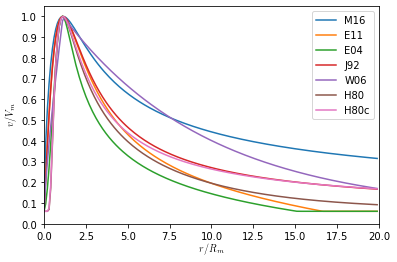

In [13]:
# Comparison between different methods
# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=True)

t = sidr.interpolate('2007-11-15 00:00:00')
t.gen_radial_fields(fraction=0.56, angle=19.2, swrf=0.9)
t.calc_rmax(methods=['E11'], vlimit=[np.inf])

fig, ax = plt.subplots()
r = np.arange(0, 20, 0.1)
x = r*t['rmax']
y1 = np.array([t.calculate_wind(at=(i, 0), methods=['M16'], rmax_frac=[np.inf])[1] for i in x])/t['vmax']/0.88
y2 = np.array([t.calculate_wind(at=(i, 0), methods=['E11'], rmax_frac=[np.inf])[1] for i in x])/t['vmax']/0.88
y3 = np.array([t.calculate_wind(at=(i, 0), methods=['E04'], rmax_frac=[np.inf])[1] for i in x])/t['vmax']/0.88
y4 = np.array([t.calculate_wind(at=(i, 0), methods=['J92'], rmax_frac=[np.inf])[1] for i in x])/t['vmax']/0.88
y5 = np.array([t.calculate_wind(at=(i, 0), methods=['W06'], rmax_frac=[np.inf])[1] for i in x])/t['vmax']/0.88
y6 = np.array([t.calculate_wind(at=(i, 0), methods=['H80'], rmax_frac=[np.inf])[1] for i in x])/t['vmax']/0.88
y7 = np.array([t.calculate_wind(at=(i, 0), methods=['H80c'], rmax_frac=[np.inf])[1] for i in x])/t['vmax']/0.88
ax.plot(r, y1, label='M16')
ax.plot(r, y2, label='E11')
ax.plot(r, y3, label='E04')
ax.plot(r, y4, label='J92')
ax.plot(r, y5, label='W06')
ax.plot(r, y6, label='H80')
ax.plot(r, y7, label='H80c')
ax.set_xlabel('$r/R_m$', usetex=True)
ax.set_ylabel('$v/V_m$', usetex=True)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_xlim([0, 20])
ax.legend()